In [6]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.precision',2)

In [7]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
#combined_data = pd.concat([train, test], ignore_index=True)


In [8]:
print(train.shape)
print(test.shape)
#print(combined_data.shape)
#576/(576+120)
#training size:
size_train_70=int((120*0.7)/0.3)
size_train_60=int((120*0.6)/0.4)
size_train_50=int((120*0.5)/0.5)
print(size_train_70)
print(size_train_60)
print(size_train_50)

(576, 12)
(120, 12)
280
180
120


In [9]:
import pandas as pd

#train_70=train.sample(n=size_train_70, random_state=42)
train_70 = train.groupby('fake', group_keys=False).apply(lambda x: x.sample(min(len(x), size_train_70 // 2), random_state=42))
train_60=train.groupby('fake', group_keys=False).apply(lambda x: x.sample(min(len(x), size_train_60 // 2), random_state=42))
train_50=train.groupby('fake', group_keys=False).apply(lambda x: x.sample(min(len(x), size_train_50 // 2), random_state=42))

In [10]:
train_70.head()
print(train_70.shape)
print(test.shape)
train_50.head()
#train.tail()

(280, 12)
(120, 12)


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
45,1,0.00,3,0.0,0,93,0,0,751,380510,0,0
157,1,0.00,2,0.0,0,9,0,1,91,408,635,0
256,1,0.24,0,0.0,0,0,0,1,353,1261,2187,0
42,1,0.00,2,0.0,0,23,0,0,433,3678,1359,0
181,1,0.00,2,0.0,0,0,0,1,81,1358,127,0


In [11]:
train_50.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
45,1,0.00,3,0.0,0,93,0,0,751,380510,0,0
157,1,0.00,2,0.0,0,9,0,1,91,408,635,0
256,1,0.24,0,0.0,0,0,0,1,353,1261,2187,0
42,1,0.00,2,0.0,0,23,0,0,433,3678,1359,0
181,1,0.00,2,0.0,0,0,0,1,81,1358,127,0


In [12]:
train_70.info()
# #rows= #non-null count -> no missing exist
#test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 45 to 458
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           280 non-null    int64  
 1   nums/length username  280 non-null    float64
 2   fullname words        280 non-null    int64  
 3   nums/length fullname  280 non-null    float64
 4   name==username        280 non-null    int64  
 5   description length    280 non-null    int64  
 6   external URL          280 non-null    int64  
 7   private               280 non-null    int64  
 8   #posts                280 non-null    int64  
 9   #followers            280 non-null    int64  
 10  #follows              280 non-null    int64  
 11  fake                  280 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 28.4 KB


In [13]:
#train_60.describe()
test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.00,120.00,120.00,120.00,120.00,120.00,120.0,120.00,120.00,1.20e+02,120.00,120.0
mean,0.76,0.18,1.55,0.07,0.04,27.20,0.1,0.31,82.87,4.96e+04,779.27,0.5
std,0.43,0.24,1.19,0.21,0.20,42.59,0.3,0.46,230.47,3.82e+05,1409.38,0.5
min,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00e+00,1.00,0.0
25%,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.00,1.00,6.72e+01,119.25,0.0
50%,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.00,8.00,2.16e+02,354.50,0.5
75%,1.00,0.33,2.00,0.00,0.00,45.25,0.0,1.00,58.25,5.93e+02,668.25,1.0
max,1.00,0.89,9.00,1.00,1.00,149.00,1.0,1.00,1879.00,4.02e+06,7453.00,1.0


In [14]:
train_70['fake'].value_counts()
train_50['fake'].value_counts()
#test['fake'].value_counts()

fake
0    60
1    60
Name: count, dtype: int64

In [15]:
train_70['fake'].value_counts(normalize=True)
## The distribution of class labels is not imbalanced

fake
0    0.5
1    0.5
Name: proportion, dtype: float64

In [16]:
train_70.sort_values(by='#follows',ascending=False).head(10)
#train_70['nums/length fullname'].sort_values()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
276,1,0.00,1,0.0,0,30,0,1,103,1775,7500,0
154,1,0.14,2,0.0,0,59,0,0,7,14222,7399,0
548,0,0.00,1,0.0,1,0,0,0,0,2346,7272,1
173,1,0.00,2,0.0,0,149,1,0,130,39867,4664,0
115,1,0.10,1,0.1,0,0,0,0,711,748,4659,0
175,1,0.00,2,0.0,0,19,0,1,917,1158,3932,0
355,1,0.18,1,0.0,0,0,0,1,108,864,3646,1
132,1,0.00,2,0.0,0,149,0,1,92,484,3296,0
400,0,0.00,0,0.0,0,0,0,0,9,589,2980,1
538,0,0.00,2,0.0,0,0,0,0,0,351,2663,1


In [17]:
train_70['#followers'].mean()

75311.88214285714

In [18]:
train_70[train_70['fake']==False]

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
45,1,0.00,3,0.0,0,93,0,0,751,380510,0,0
157,1,0.00,2,0.0,0,9,0,1,91,408,635,0
256,1,0.24,0,0.0,0,0,0,1,353,1261,2187,0
42,1,0.00,2,0.0,0,23,0,0,433,3678,1359,0
181,1,0.00,2,0.0,0,0,0,1,81,1358,127,0
...,...,...,...,...,...,...,...,...,...,...,...,...
107,1,0.00,2,0.0,0,113,1,0,209,5406,589,0
137,1,0.00,2,0.0,0,0,1,1,1020,464,1039,0
148,1,0.22,2,0.0,0,133,0,0,396,881,375,0
227,1,0.00,3,0.0,0,24,0,1,144,419,271,0


In [19]:
train_70[train_70['fake']==False]['#followers'].mean()

150514.32857142857

In [20]:
train_70[train_70['fake']==False].describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,140.0,140.00,140.00,1.40e+02,1.40e+02,140.00,140.00,140.00,140.00,1.40e+02,140.00,140.0
mean,1.0,0.04,1.77,8.14e-03,7.14e-03,39.39,0.19,0.41,157.66,1.51e+05,727.46,0.0
std,0.0,0.09,1.17,4.29e-02,8.45e-02,43.97,0.39,0.49,231.91,1.34e+06,1105.49,0.0
min,1.0,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,1.00,9.00e+00,0.00,0.0
25%,1.0,0.00,1.00,0.00e+00,0.00e+00,0.00,0.00,0.00,14.00,2.55e+02,201.75,0.0
50%,1.0,0.00,2.00,0.00e+00,0.00e+00,25.00,0.00,0.00,74.50,5.53e+02,410.50,0.0
75%,1.0,0.00,2.00,0.00e+00,0.00e+00,64.00,0.00,1.00,150.75,1.38e+03,782.50,0.0
max,1.0,0.45,10.00,3.30e-01,1.00e+00,149.00,1.00,1.00,1159.00,1.53e+07,7500.00,0.0


In [21]:
train_70.mean(numeric_only=True)

profile pic                 0.69
nums/length username        0.17
fullname words              1.47
nums/length fullname        0.04
name==username              0.03
description length         22.49
external URL                0.09
private                     0.39
#posts                     83.56
#followers              75311.88
#follows                  507.60
fake                        0.50
dtype: float64

In [22]:
train_70.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
395,0,0.20,0,0.0,0,0,0,1,0,11,157,1
425,0,0.50,1,0.0,0,0,0,0,0,17,44,1
436,0,0.00,2,0.0,0,0,0,0,0,18,49,1
515,0,0.10,0,0.0,0,0,0,0,0,37,4,1
458,1,0.27,1,0.0,0,0,0,1,1,51,59,1


In [23]:
# no longer find categorical variables

#categorical = [var for var in train.columns if train[var].dtype=='O']

#print('There are {} categorical variables\n'.format(len(categorical)))

#print('The categorical variables are :\n\n', categorical)

In [24]:
#normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# normalize the training data
train70_normalized = pd.DataFrame(scaler.fit_transform(train_70), columns=train.columns)
train60_normalized = pd.DataFrame(scaler.fit_transform(train_60), columns=train.columns)
train50_normalized = pd.DataFrame(scaler.fit_transform(train_50), columns=train.columns)
test_normalized=pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

train70_normalized.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00,2.80e+02,2.80e+02,2.80e+02,280.0
mean,0.69,0.18,0.15,0.04,0.03,0.15,0.09,0.39,7.21e-02,4.91e-03,6.77e-02,0.5
std,0.46,0.24,0.10,0.15,0.16,0.26,0.29,0.49,1.56e-01,6.17e-02,1.31e-01,0.5
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.0
25%,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00e+00,2.46e-06,7.73e-03,0.0
50%,1.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,7.77e-03,8.08e-06,2.50e-02,0.5
75%,1.00,0.33,0.20,0.00,0.00,0.21,0.00,1.00,7.05e-02,4.39e-05,7.10e-02,1.0
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00e+00,1.00e+00,1.00e+00,1.0


In [25]:
#no longer weighting is neede
#𝑁 = Total number of samples in the data set
#n = len(train) 
#print(n)
#𝑁𝑠 = Total number of samples in each class
#train['fake'].value_counts()
#ns=288
#𝑁𝑐 = Total number of classes in the data set
#nc=2

In [26]:
#no longer binning continuous variables (convert them into discrete intervals)

(array([[280.,   0.,   0.,   0.,   0.],
        [280.,   0.,   0.,   0.,   0.],
        [280.,   0.,   0.,   0.,   0.],
        [280.,   0.,   0.,   0.,   0.],
        [280.,   0.,   0.,   0.,   0.],
        [280.,   0.,   0.,   0.,   0.],
        [280.,   0.,   0.,   0.,   0.],
        [280.,   0.,   0.,   0.,   0.],
        [280.,   0.,   0.,   0.,   0.],
        [278.,   1.,   0.,   0.,   1.],
        [280.,   0.,   0.,   0.,   0.],
        [280.,   0.,   0.,   0.,   0.]]),
 array([       0. ,  3067707.6,  6135415.2,  9203122.8, 12270830.4,
        15338538. ]),
 <a list of 12 BarContainer objects>)

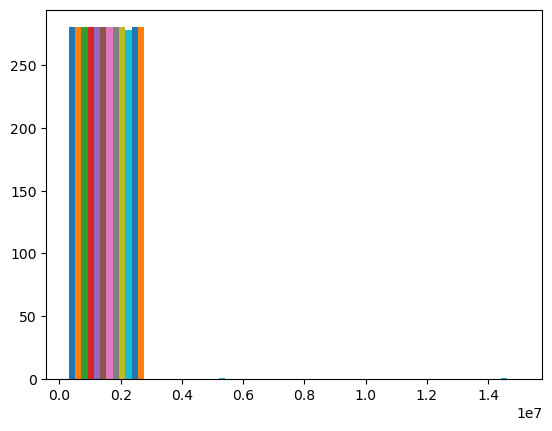

In [27]:
#knwoing about the distribution of data to decide if Gaussian Naive Bayes or multinomial Naive Bayes
import matplotlib.pyplot as plt
#data=list(train_normalized['fake'])
#data=list(train_normalized['#follows'])
#data=list(train_normalized['#followers'])
#data=list(train_normalized['#posts'])
#data=list(train_normalized['private'])
#data=list(train_normalized['external URL'])
#data=list(train_normalized['description length'])
#data=list(train['name==username'])
#data=list(train['nums/length fullname'])
#data=list(train['fullname words'])
#data=list(train['fullname words'])
#data=list(train['nums/length username'])
#data=list(train['profile pic'])
#discrete features such as counts
plt.hist(train_70,bins=5)

In [28]:
train70_normalized.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1.0,0.00,0.3,0.0,0.0,0.62,0.0,0.0,0.65,2.48e-02,0.00,0.0
1,1.0,0.00,0.2,0.0,0.0,0.06,0.0,1.0,0.08,2.66e-05,0.08,0.0
2,1.0,0.26,0.0,0.0,0.0,0.00,0.0,1.0,0.30,8.22e-05,0.29,0.0
3,1.0,0.00,0.2,0.0,0.0,0.15,0.0,0.0,0.37,2.40e-04,0.18,0.0
4,1.0,0.00,0.2,0.0,0.0,0.00,0.0,1.0,0.07,8.85e-05,0.02,0.0


In [29]:
#train_normalized.sort_values(by='#follows',ascending=True)

In [40]:
#train model

from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

x_train70=train70_normalized.drop('fake', axis=1) 
x_train60=train60_normalized.drop('fake', axis=1) 
x_train50=train50_normalized.drop('fake', axis=1) 
x_test=test_normalized.drop('fake', axis=1) 

y_train70 = train70_normalized['fake'] 
y_train60 = train60_normalized['fake'] 
y_train50 = train50_normalized['fake'] 
y_test= test['fake'] 

#Gaussian Naive Bayes classifier
naive_bayes70 = GaussianNB()
naive_bayes60 = GaussianNB()
naive_bayes50 = GaussianNB()

#train model
naive_bayes70.fit(x_train70, y_train70)
naive_bayes60.fit(x_train60, y_train60)
naive_bayes50.fit(x_train50, y_train50)

#predict test labels
predictions70_test = naive_bayes70.predict(x_test)
predictions60_test = naive_bayes60.predict(x_test)
predictions50_test = naive_bayes50.predict(x_test)

print('Accuracy score: {}'.format(accuracy_score(y_test, predictions50_test)))
print('Precision score: {}'.format(precision_score(y_test, predictions50_test)))
print('Recall score: {}'.format(recall_score(y_test, predictions50_test)))
print('F1 score: {}'.format(f1_score(y_test, predictions50_test)))

Accuracy score: 0.9166666666666666
Precision score: 0.9629629629629629
Recall score: 0.8666666666666667
F1 score: 0.912280701754386


In [31]:
#print(predictions)
#print(x_train)
print(y_test)

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64


In [32]:
#training evaluation
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

x_train70=train70_normalized.drop('fake', axis=1) 
x_train60=train60_normalized.drop('fake', axis=1) 
x_train50=train50_normalized.drop('fake', axis=1) 
x_test=test_normalized.drop('fake', axis=1) 

y_train70 = train70_normalized['fake'] 
y_train60 = train60_normalized['fake'] 
y_train50 = train50_normalized['fake'] 
y_test= test_normalized['fake'] 

#Gaussian Naive Bayes classifier
naive_bayes70 = GaussianNB()
naive_bayes60 = GaussianNB()
naive_bayes50 = GaussianNB()

naive_bayes70.fit(x_train70, y_train70)
naive_bayes60.fit(x_train60, y_train60)
naive_bayes50.fit(x_train50, y_train50)

predictions_train70 = naive_bayes70.predict(x_train70)
predictions_train60 = naive_bayes60.predict(x_train60)
predictions_train50 = naive_bayes50.predict(x_train50)

print('Accuracy score: {}'.format(accuracy_score(y_train50, predictions_train50)))
print('Precision score: {}'.format(precision_score(y_train50, predictions_train50)))
print('Recall score: {}'.format(recall_score(y_train50, predictions_train50)))
print('F1 score: {}'.format(f1_score(y_train50, predictions_train50)))

Accuracy score: 0.875
Precision score: 0.8947368421052632
Recall score: 0.85
F1 score: 0.8717948717948718


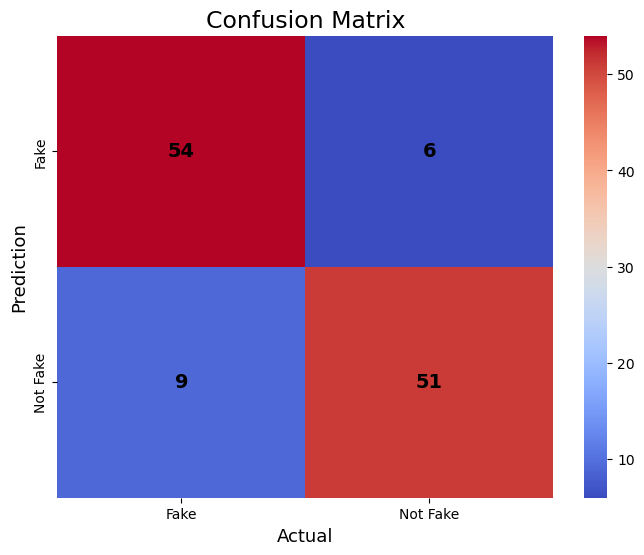

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_train50, predictions_train50)
#cm = confusion_matrix(y_train60, predictions_train60)
#cm = confusion_matrix(y_train50, predictions_train50) 


#cm = confusion_matrix(y_test, predictions50_test)
#cm = confusion_matrix(y_test, predictions60_test)
#cm = confusion_matrix(y_test, predictions70_test) 

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=False, cmap='coolwarm', xticklabels=['Fake', 'Not Fake'], yticklabels=['Fake', 'Not Fake'])

# Add numbers to the heatmap
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j + 0.5, i + 0.5, str(cm[i, j]), ha='center', va='center', color='black', fontweight='bold', fontsize=14)

plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)

# Save the plot as a JPG file
plt.savefig('confusion_matrix.jpg', format='jpg')
plt.show()

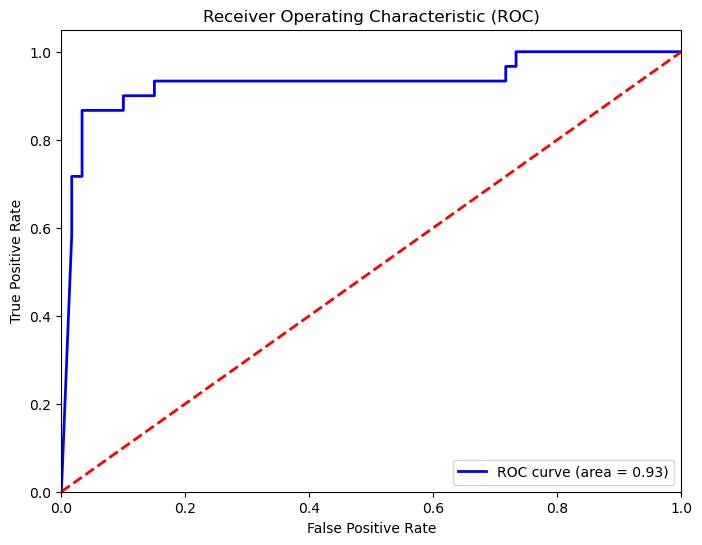

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(x_train50, y_train50)

# Predict probabilities of the positive class
y_prob = naive_bayes.predict_proba(x_test)[:, 1]

# Calculate false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

plt.savefig('ROC.jpg', format='jpg')
plt.show()

In [50]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information scores between features and target variable
mutual_info_scores = mutual_info_classif(x_train50, y_train50)

# Create a dictionary to store feature names and their corresponding mutual information scores
feature_scores = dict(zip(x_train50.columns, mutual_info_scores))

# Sort the dictionary based on mutual information scores in descending order
sorted_feature_scores = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Select the top k features with the highest mutual information scores
k = 5  # Number of features to select
selected_features = [feature[0] for feature in sorted_feature_scores[:k]]

# Print selected features
print("Selected features:", selected_features)

# Subset the training data with selected features
x_train_selected = x_train50[selected_features]
x_train_selected = x_train50[selected_features]

# Train Naive Bayes model with selected features
naive_bayes_selected = GaussianNB()
naive_bayes_selected.fit(x_train_selected, y_train50)
predictions_train_selected = naive_bayes_selected.predict(x_train_selected)


Selected features: ['#followers', '#posts', 'profile pic', 'description length', 'nums/length username']


In [ ]:

print('Accuracy score: {}'.format(accuracy_score(y_train, predictions_train_selected)))
print('Precision score: {}'.format(precision_score(y_train, predictions_train_selected)))
print('Recall score: {}'.format(recall_score(y_train, predictions_train_selected)))
print('F1 score: {}'.format(f1_score(y_train, predictions_train_selected)))

In [ ]:
# Selected features
#selected_features = ['#followers', '#posts', 'profile pic', 'nums/length username', 'description length']


y_train = train_normalized['fake'] 
y_test= test_normalized['fake'] 

# Subset x_train and x_test with selected features
x_train_subset = train_normalized[selected_features]
x_test_subset = test_normalized[selected_features]

# Train Naive Bayes model with selected features
naive_bayes = GaussianNB()
naive_bayes.fit(x_train_subset, y_train)

# Predictions on training data
predictions_train = naive_bayes.predict(x_train_subset)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {}'.format(accuracy_score(y_train, predictions_train)))
print('Precision score: {}'.format(precision_score(y_train, predictions_train)))
print('Recall score: {}'.format(recall_score(y_train, predictions_train)))
print('F1 score: {}'.format(f1_score(y_train, predictions_train)))


In [ ]:


y_train = train_normalized['fake'] 
y_test= test_normalized['fake'] 

# Subset x_train and x_test with selected features
x_train_subset = train_normalized[selected_features]
x_test_subset = test_normalized[selected_features]

# Train Naive Bayes model with selected features
naive_bayes = GaussianNB()
naive_bayes.fit(x_train_subset, y_train)

# Predictions on training data
predictions_test = naive_bayes.predict(x_test_subset)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {}'.format(accuracy_score(y_test, predictions_test)))
print('Precision score: {}'.format(precision_score(y_test, predictions_test)))
print('Recall score: {}'.format(recall_score(y_test, predictions_test)))
print('F1 score: {}'.format(f1_score(y_test, predictions_test)))
